In [97]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

%matplotlib inline


__torch_version__ = torch.__version__
__torch_version__ 

'2.7.1+cu128'

In [98]:
W = .7
B = .2

X = torch.arange(0,1,0.02).unsqueeze_(1)
X.shape

torch.Size([50, 1])

In [99]:
Y = W * X + B


In [100]:
Y.shape

torch.Size([50, 1])

### Data Split

In [101]:
split = int(0.8 * len(X))
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

### Data visualize

In [102]:
def visualze_data(X_train = X_train, Y_train = Y_train, X_test = X_test, Y_test = Y_test, Pred=None):
    plt.scatter(X_train.numpy(), Y_train.numpy(), label = "Training Data", c="b")
    plt.scatter(X_test.numpy(), Y_test.numpy(), label = "Test Data", c="r")
    if Pred is not None:
    # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(X_test.numpy(), Pred.numpy(), c="r", s=4, label="Predictions")
    plt.title("Training and Testing Data Visualized")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


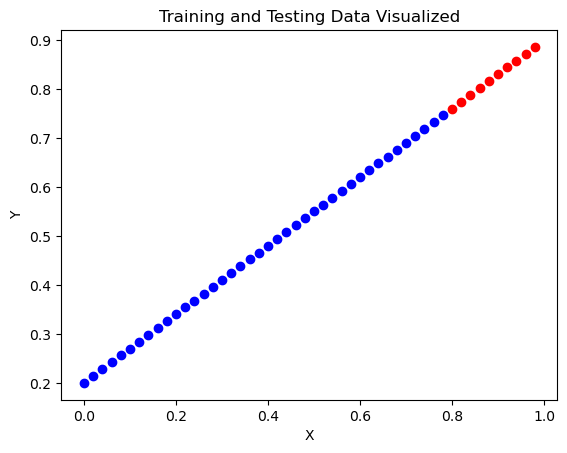

In [103]:
visualze_data(X_train, Y_train, X_test, Y_test)

### Build the model

In [104]:
class LinearRegression(nn.Module):
    def __init__(self):

        super().__init__() # inintialize the parent class nn.Module

        # tells PyTorch that these are trainable parameters of the model,
        # req_grad is set to true by default
        self.weights = nn.Parameter(torch.randn(1, 1, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, 1, dtype=torch.float32))

    def forward(self, X):
        return self.weights * X + self.bias

In [105]:
torch.manual_seed(42)

model = LinearRegression()

list(model.parameters())

[Parameter containing:
 tensor([[0.3367]], requires_grad=True),
 Parameter containing:
 tensor([[0.1288]], requires_grad=True)]

In [106]:
model.state_dict()      # what the model contains

OrderedDict([('weights', tensor([[0.3367]])), ('bias', tensor([[0.1288]]))])

In [107]:
# make predictions
with torch.inference_mode():  # turns off gradient tracking
    y_preds = model(X_test)

In [108]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

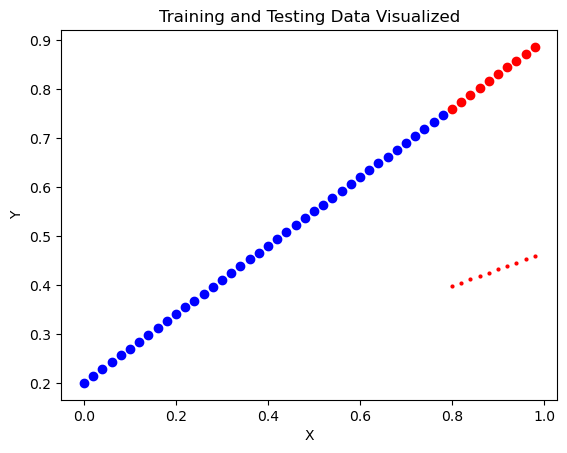

In [109]:
visualze_data(Pred=y_preds)

In [110]:
model.state_dict()

OrderedDict([('weights', tensor([[0.3367]])), ('bias', tensor([[0.1288]]))])

## Training Loop

In [111]:
loss_fn_1 = nn.MSELoss()
loss_fn_2 = nn.L1Loss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [112]:
torch.manual_seed(42)

epochs = 100

train_l = []
test_l = []
epoch_count = []

for epoch in range(epochs):

# model in training mode
    model.train()
    Y_pred = model(X_train) 

    train_loss = loss_fn_2(Y_train, Y_pred)
    
    # Clears old gradients stored in each parameter.
    optimizer.zero_grad()
    train_loss.backward()
    # updates the parameter values
    optimizer.step()

# model in eval mode
    model.eval()

    with torch.inference_mode():
        Y_pred = model(X_test)

        test_loss = loss_fn_2(Y_test, Y_pred)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
            print(f"Model state dict: {model.state_dict()}")
            epoch_count.append(epoch)

            # convert to numpy the copy of the tensor that is disconnected 
            # from the computation graph.
            # for scaler, we can also use .item() instead of .detach().numpy()
            train_l.append(train_loss.detach().numpy())
            test_l.append(test_loss.detach().numpy())


Epoch: 0 | Train Loss: 0.2129 | Test Loss: 0.3811
Model state dict: OrderedDict([('weights', tensor([[0.3406]])), ('bias', tensor([[0.1388]]))])
Epoch: 10 | Train Loss: 0.1035 | Test Loss: 0.2515
Model state dict: OrderedDict([('weights', tensor([[0.3795]])), ('bias', tensor([[0.2338]]))])
Epoch: 20 | Train Loss: 0.0628 | Test Loss: 0.1728
Model state dict: OrderedDict([('weights', tensor([[0.4133]])), ('bias', tensor([[0.2823]]))])
Epoch: 30 | Train Loss: 0.0529 | Test Loss: 0.1360
Model state dict: OrderedDict([('weights', tensor([[0.4385]])), ('bias', tensor([[0.2968]]))])
Epoch: 40 | Train Loss: 0.0487 | Test Loss: 0.1175
Model state dict: OrderedDict([('weights', tensor([[0.4586]])), ('bias', tensor([[0.2973]]))])
Epoch: 50 | Train Loss: 0.0452 | Test Loss: 0.1065
Model state dict: OrderedDict([('weights', tensor([[0.4766]])), ('bias', tensor([[0.2923]]))])
Epoch: 60 | Train Loss: 0.0417 | Test Loss: 0.0968
Model state dict: OrderedDict([('weights', tensor([[0.4942]])), ('bias', t

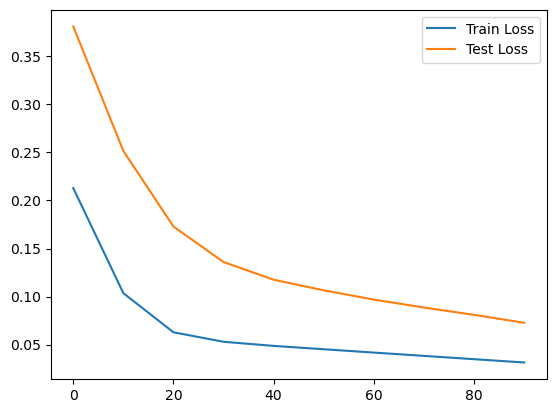

In [113]:
plt.plot(epoch_count, train_l, label='Train Loss')
plt.plot(epoch_count, test_l, label='Test Loss')
plt.legend()
plt.show()

In [114]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {W}, bias: {B}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([[0.5609]])), ('bias', tensor([[0.2583]]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.2


### Make predictions

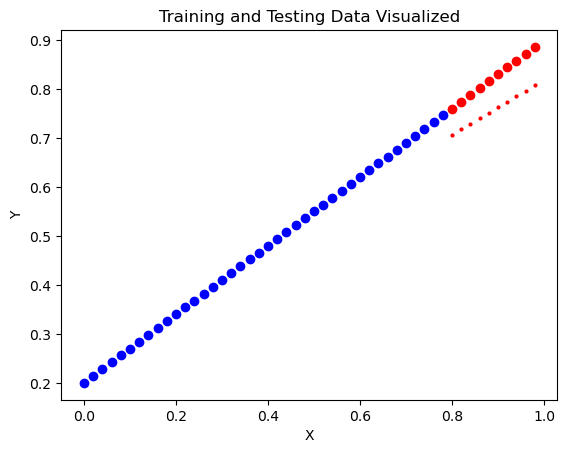

In [115]:
model.eval()
with torch.inference_mode():
    y_p = model(X_test)

visualze_data(Pred=y_p)